In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### Импортируем Fashion MNIST датасет

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Анализ датасета

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

### Предварительная обработка данных

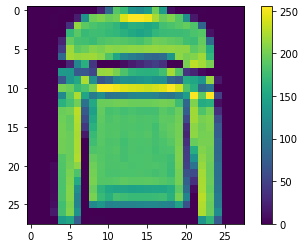

In [10]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images[5][:10]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

In [12]:
# Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:
train_images = train_images / 255.0
test_images = test_images / 255.0

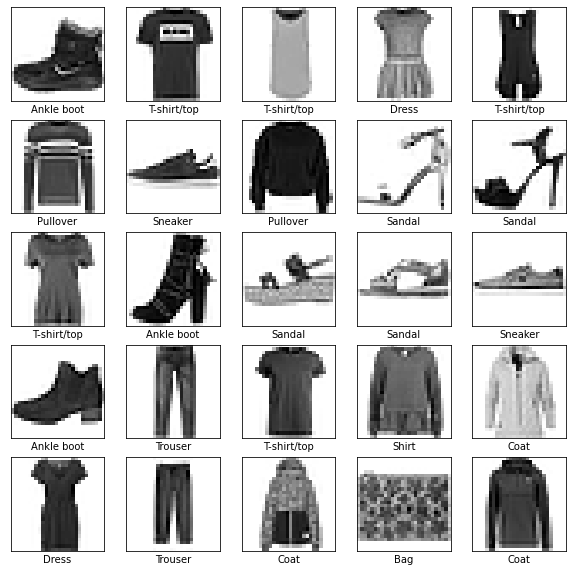

In [13]:
# Посмотрим первые 25 изображений:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Построение модели

In [14]:
# Создадим 3 слоя нейронной сети с помощью функционала Keras.layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### Компиляция модели

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.   

SparseCategoricalCrossentropy - функция потерь кроссэнтропии используется, когда существует два или более классов меток.

In [15]:
SparCatCross = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=SparCatCross,
              metrics=['accuracy'])

### Тренировка модели

In [16]:
%%time
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4907 - accuracy: 0.8284
Epoch 2/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3704 - accuracy: 0.8657
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3323 - accuracy: 0.8790
Epoch 4/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.3084 - accuracy: 0.8869
Epoch 5/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2927 - accuracy: 0.8923
Epoch 6/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2766 - accuracy: 0.8975
Epoch 7/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2651 - accuracy: 0.9014
Epoch 8/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2557 - accuracy: 0.9054
Epoch 9/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2464 - accuracy: 0.9088
Epoch 10/10
60

In [17]:
# Проверяем точность на тестовых данных
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3551 - accuracy: 0.8825

Test accuracy: 0.8825


### Предсказания нейросети

In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

In [20]:
predictions[5]

array([1.0358858e-06, 9.9999881e-01, 1.1388578e-09, 2.1774465e-08,
       5.4799607e-08, 1.7654622e-13, 1.6971660e-08, 1.4848670e-19,
       2.5912694e-10, 3.6572977e-16], dtype=float32)

In [21]:
class_names[np.argmax(predictions[5])]

'Trouser'

In [22]:
class_names[test_labels[5]]

'Trouser'

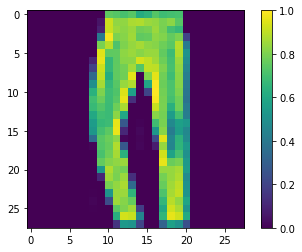

In [23]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Посмотрим предсказания графически:

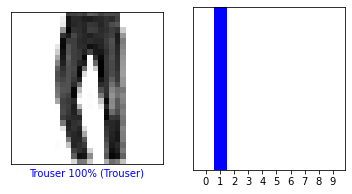

In [25]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

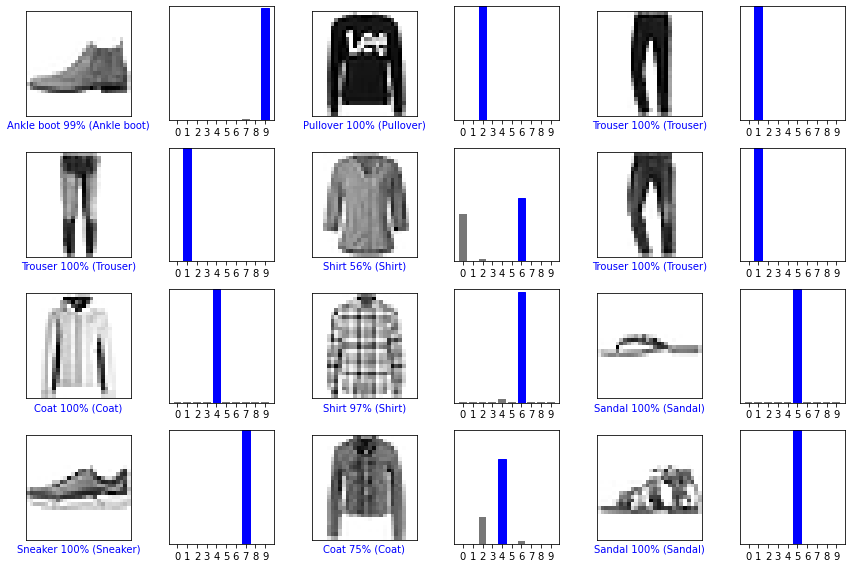

In [26]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Использование полученной модели

In [27]:
# Возьмем одно изображение из тестовой выборки и посмотрим предсказание нейронной сети
img = test_images[1]
print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.7601576e-05 7.2007925e-18 9.9993813e-01 2.8331814e-11 2.8770954e-05
  5.1399018e-16 5.4863585e-06 1.5390799e-17 4.2933393e-11 9.8319654e-17]]


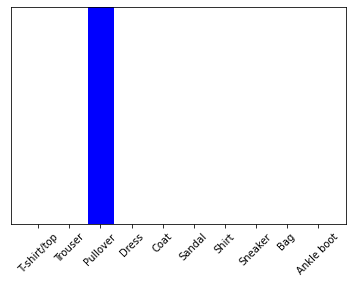

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
# keras.Model.predict возвращает список списков — по одному списку для каждого предсказания в батче. 
# Нам нужны предсказания только для одного изображения:
class_names[np.argmax(predictions_single[0])]

'Pullover'

### Улучшение модели нейронной сети

In [32]:
# Создадим 4 слоя нейронной сети
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

In [33]:
# Компиляция модели
model.compile(optimizer='adam', loss = SparCatCross, metrics=['accuracy'])

In [34]:
%%time
# Тренировка модели
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4993 - accuracy: 0.8222
Epoch 2/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3704 - accuracy: 0.8640
Epoch 3/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3324 - accuracy: 0.8780
Epoch 4/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3077 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2946 - accuracy: 0.8900
Epoch 6/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2784 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2671 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2549 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2458 - accuracy: 0.9077
Epoch 10/10
60

In [35]:
# Проверяем точность на тестовых данных
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3461 - accuracy: 0.8760

Test accuracy: 0.876


In [36]:
# Проверим несколько вариантов моделей
models = dict()

models['128'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

models['128_32'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

models['128_64'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

models['128_64_32'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

In [37]:
for k in models:
    models[k].compile(optimizer='adam', loss = SparCatCross, metrics=['accuracy'])

In [38]:
%%time
n_epochs = 12
histories = dict()

for k in models:
    print(f'Обучение модели {k}')
    histories[k] = models[k].fit(train_images, train_labels,
        validation_data = (test_images, test_labels), 
        epochs=n_epochs, verbose=0)

Обучение модели 128
Обучение модели 128_32
Обучение модели 128_64
Обучение модели 128_64_32
Wall time: 1min 47s


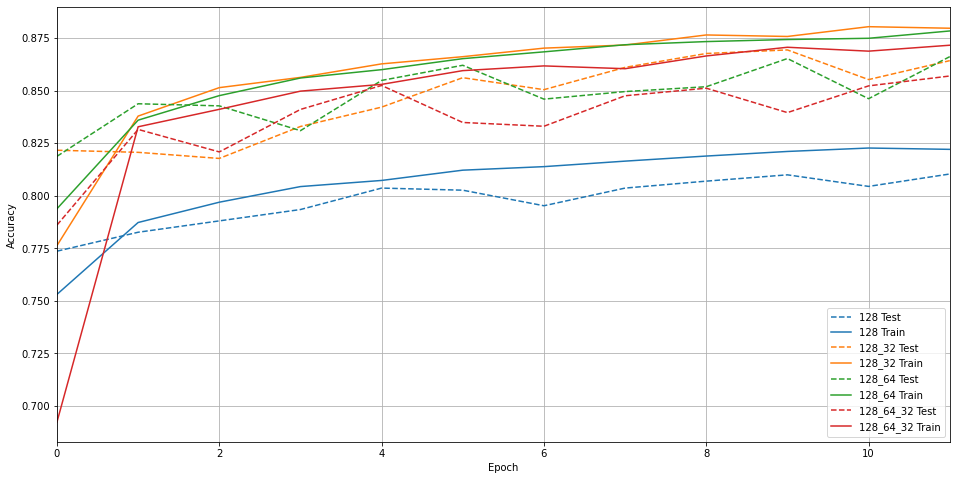

In [39]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,8))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Test')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
    plt.xlabel('Epoch')
    plt.xlim([0, max(history.epoch)])
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.grid()

plot_history(histories.items())

In [40]:
# Проверяем точность на тестовых данных
test_loss, test_acc = models['128_64'].evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 1.5948 - accuracy: 0.8661

Test accuracy: 0.8661


In [41]:
models['128_64'].summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### Попробуем использовать callback ReduceLROnPlateau

Функция уменьшения скорости обучения, когда метрика перестаёт улучшаться.

In [62]:
%%time
n_epochs = 10
histories = dict()
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.001)

for k in models:
    print(f'Обучение модели {k}')
    histories[k] = models[k].fit(train_images, train_labels, callbacks=[reduce_lr],
        validation_data = (test_images, test_labels), 
        epochs=n_epochs, verbose=0)

Обучение модели 128
Обучение модели 128_32
Обучение модели 128_64
Обучение модели 128_64_32
Wall time: 1min 29s


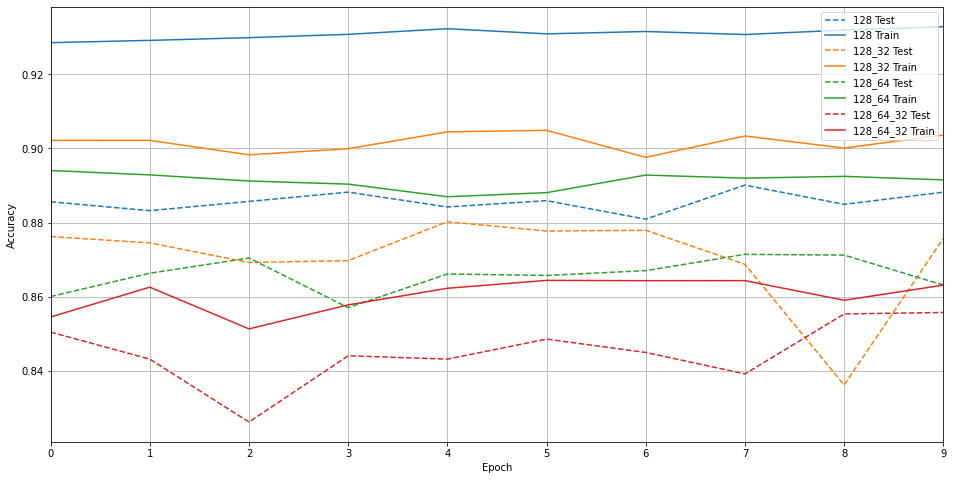

In [63]:
plot_history(histories.items())

In [64]:
# Проверяем точность на тестовых данных
test_loss, test_acc = models['128'].evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 1.5728 - accuracy: 0.8882

Test accuracy: 0.8882


#### Модель нейросети с внутренним слоем из 128 нейронов и callback ReduceLROnPlateau показала наибольшую точность.